# DICpy: digital image correlation with Python

### Earthquake Engineering and Structural Dynamics (EESD) Lab at EPFL

#### Example 1: estimating the strain field using two images.

In [1]:
from DICpy.DIC_2D import RegularGrid, PostProcessing
from DICpy.DIC_2D import LucasKanade
from DICpy.DIC_2D import ImageRegistration
from DICpy.DIC_2D import CoarseFine
from DICpy.DIC_2D import GradientZero
from DICpy.DIC_2D import GradientOne
from DICpy.DIC_2D import Oversampling
from DICpy.DIC_2D import Images

from DICpy.utils import *
import matplotlib.pyplot as plt
import numpy as np

Read images.

In [2]:
# Path to images.
path = r"images_ex1"

# Instantiate an object of the class Images
imobj = Images()

# calibrate pixel_dim for conversion pixel/length.
imobj.calibration(pixel_dim=0.43)

# read the speckle images.
imobj.read_speckle_images(path=path, extension="png", verbose=True)

mm/pixel:  0.43
DICpy: reading speckle images.
Foto1.png
Foto2.png


Determine the region of interest (ROI) and set a rectangular mesh, where the center of each element is used for estimating the displacement field.

In [3]:
# Instantiate an object of RectangularMesh with an object of Images.
meshobj = RegularGrid(images_obj=imobj)

# Construct the mesh by giving the extreme points of a rectangular area and the number of divisions.
# Alternatively: point_a and point_b can be set using the mouse if no argument is sent via define_mesh.
# Click next to accept the grid.
meshobj.define_mesh(point_a=(1500,3000), point_b=(6000, 400), nx=30, ny=20, show_grid=False)

Run DIC.

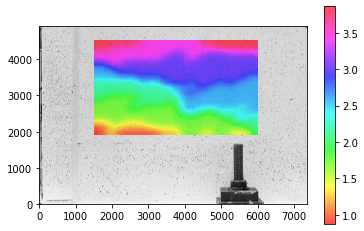

In [5]:
# Run the DIC analysis without subpixel approximation:
anaobj = ImageRegistration(mesh_obj=meshobj)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)

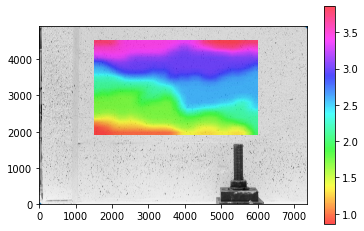

In [4]:
# Run the DIC analysis with subpixel approximation (Oversampling):
anaobj = Oversampling(mesh_obj=meshobj, over_x=2, over_y=2)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)

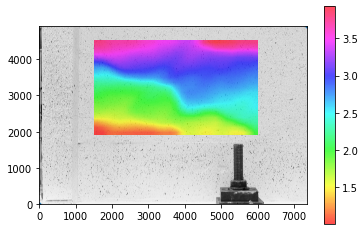

In [6]:
# Run the DIC analysis with subpixel approximation (coarse-fine method with 2 iterations):
anaobj = CoarseFine(mesh_obj=meshobj, niter=2)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)

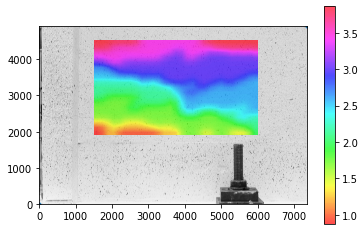

In [7]:
# Run the DIC analysis with subpixel approximation (gradient with zero order shape function):
anaobj = GradientZero(mesh_obj=meshobj)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)

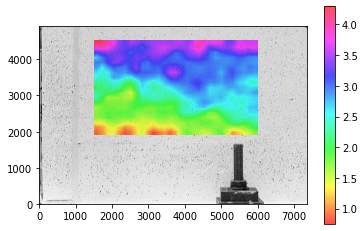

In [6]:
# Run the DIC analysis with subpixel approximation (gradient with first order shape function):
anaobj = GradientOne(mesh_obj=meshobj)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)

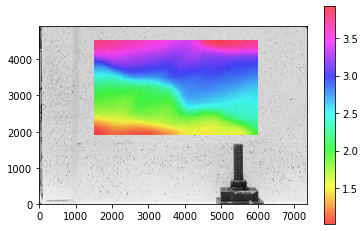

In [5]:
# Run the DIC analysis with subpixel approximation (Lucas-Kanade):
anaobj = LucasKanade(mesh_obj=meshobj)
anaobj.run()

# Plot the horizontal displacement.
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='u', step=1, smooth=True)